In [ ]:
# ESSENTIAL IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import random

## **Importing the datasets**
It will ask to sign in with Google account. **Please give required access.** No need to change anything in code, run it as it is. This will download the dataset4 file in the current runtime environment.


---

In [ ]:
# libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

dataset_id = '1UcnvyZG11vg1hbgG5Hnhn_zovJq9PqrK'

download = drive.CreateFile({'id': dataset_id})

# Download the file to a local disc
download.GetContentFile('dataset.csv')

## **Visualizing the Data in Dataset4**


---

Text(0, 0.5, 'Y')

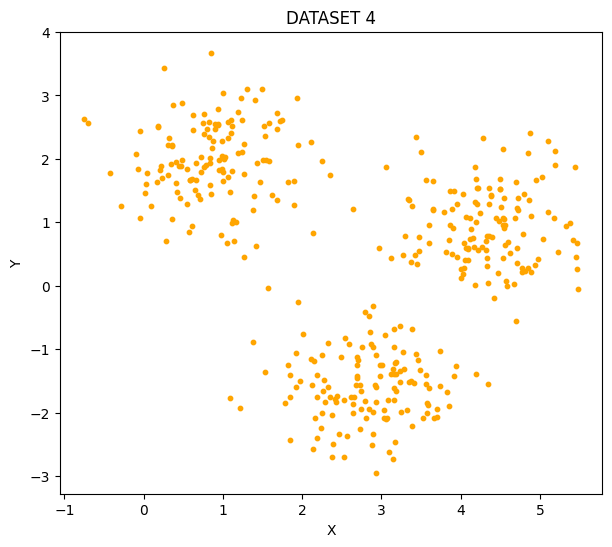

In [ ]:
dataset = pd.read_csv('/content/dataset.csv', header = None)

fig = plt.figure(figsize=(7, 6))
plt.title('DATASET 4')
plt.scatter(dataset[0], dataset[1], s=10, c = "orange")
plt.xlabel('X')
plt.ylabel('Y')

## **Gaussian Mixture Model Functions**


---

In [ ]:
dataset = pd.read_csv('dataset.csv', header = None)

def multivariate_normal_dist(X, mean, covar):
    d = len(X)
    det = np.linalg.det(covar)
    inv = np.linalg.inv(covar)
    numerator = np.exp(-0.5 * (X - mean).T.dot(inv).dot(X - mean))
    denominator = np.sqrt((2 * np.pi) ** d * det)
    return numerator / denominator

def responsibility(pi_matrix, x, mean, covar, k):
    resp = []
    for i in range(k):
        resp.append(pi_matrix[i] * multivariate_normal_dist(x, mean[i], covar[i]))

    return resp / np.sum(resp)

def get_log_likelihood(data, mean, covar, pi_matrix, k):
    ll = 0

    for i in range(len(data)):
        likelihood = 0
        for j in range(k):
            likelihood += pi_matrix[j] * multivariate_normal_dist(data[i], mean[j], covar[j])

        ll += np.log(likelihood)

    return ll

def GMM(X, k):# split the dataset into k groups
    data_split = np.array_split(np.random.permutation(X), k)

    # initialize the parameters
    pi_matrix = np.ones(k) / k
    mean = np.array([np.mean(data_split[i], axis=0) for i in range(k)])
    covar = np.array([np.cov(data_split[i].T) for i in range(k)])

    log_likelihoods = []
    e = 0.001

    while True:
        # E-step
        resp = np.array([responsibility(pi_matrix, x, mean, covar, k) for x in X])

        # M-step
        for i in range(k):
            mean[i] = np.sum(resp[:, i] * X.T, axis=1) / np.sum(resp[:, i])
            covar[i] = np.dot((resp[:, i] * (X - mean[i]).T), (X - mean[i])) / np.sum(resp[:, i])
            pi_matrix[i] = np.mean(resp[:, i])

        log_likelihoods.append(get_log_likelihood(X, mean, covar, pi_matrix, k))
        diff = log_likelihoods[-1] - log_likelihoods[-2] if len(log_likelihoods) > 1 else 1
        if diff < e:
            break

    probs = np.array([responsibility(pi_matrix, x, mean, covar, k) for x in X])
    labels = np.argmax(probs, axis=1)
    dat=dataset.values.tolist()
    score = silhouette_score(dat,labels)
    return labels, mean, covar, log_likelihoods, score

def plot_log_likelihood(log_likelihoods, k):
    plt.plot(log_likelihoods)
    plt.title('Log Likelihood vs Iterations (k = ' + str(k) + ')')
    plt.xlabel('Iterations')
    plt.ylabel('Log Likelihood')
    plt.show()

def plot_Gaussian(X, mean, covar):
    minX = np.min(X[:, 0])
    maxX = np.max(X[:, 0])

    minY = np.min(X[:, 1])
    maxY = np.max(X[:, 1])

    xx = np.linspace(minX - 0.5, maxX + 0.5, 300)
    yy = np.linspace(minY - 0.5, maxY + 0.5, 300)

    Xs, Ys = np.meshgrid(xx, yy)

    pos = np.array([Xs.flatten(), Ys.flatten()]).T

    Z = []
    for i in range(k):
        arr = np.array([multivariate_normal_dist(pt, mean[i], covar[i]) for pt in pos]).reshape(300, 300)
        Z.append(arr)

    for i in range(k):
        plt.contour(Xs, Ys, Z[i], 6, alpha = 0.5, cmap = 'viridis')


print("GMM Functions defined")

GMM Functions defined


## **Plotting Log-likehood function**


---

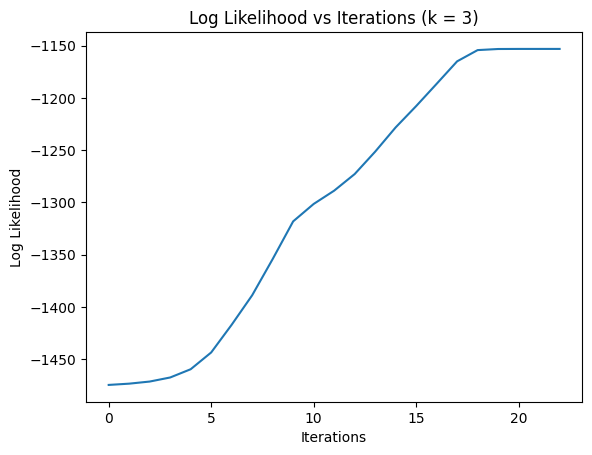

0.6586027345896964


In [ ]:
# make sure to run the above code snippet before running this.

dataset = pd.read_csv('dataset.csv', header = None)

k = 3
cluster, means, covar, log_likelihood, score = GMM(dataset.values, k)
plot_log_likelihood(log_likelihood, k)
print(score)

## **Plotting GMM clusters and log-likelihood for different values of k**


---

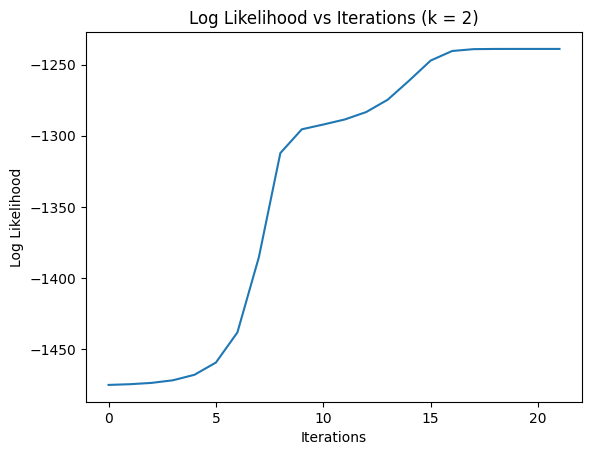

Score :  0.5468426006958949


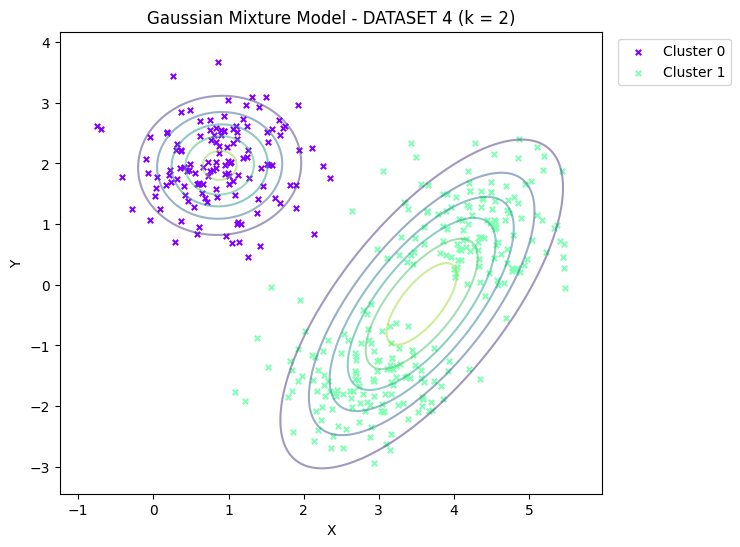

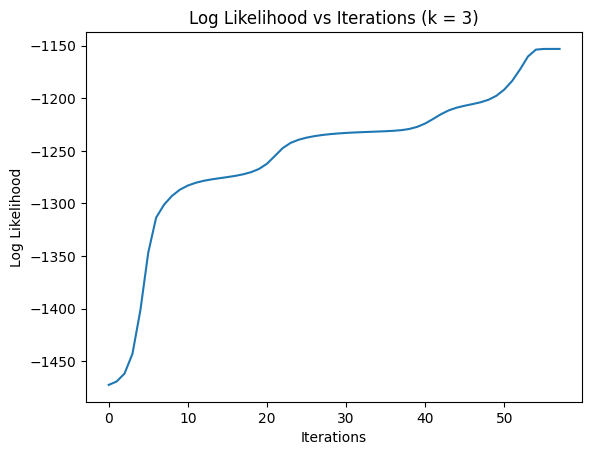

Score :  0.6586027345896964


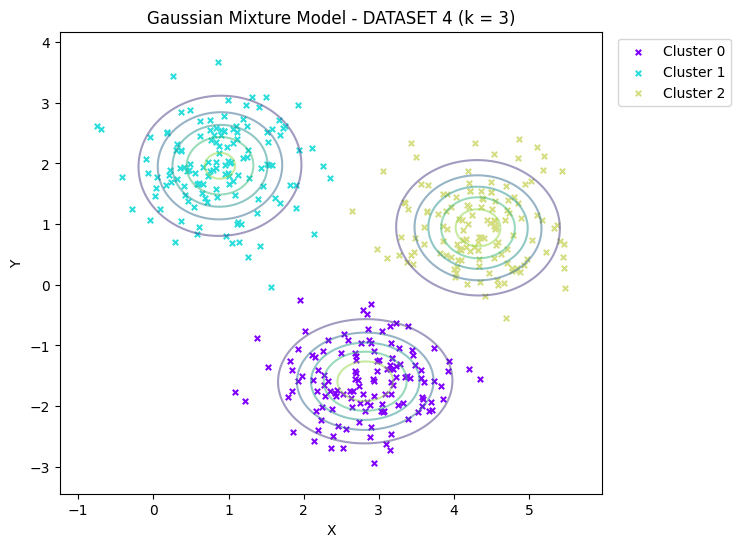

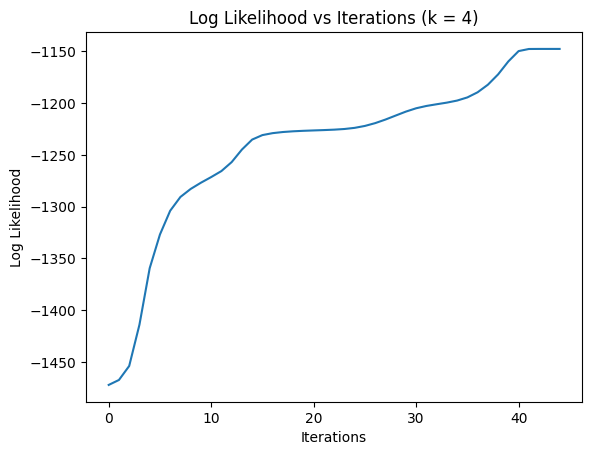

Score :  0.47972039871293504


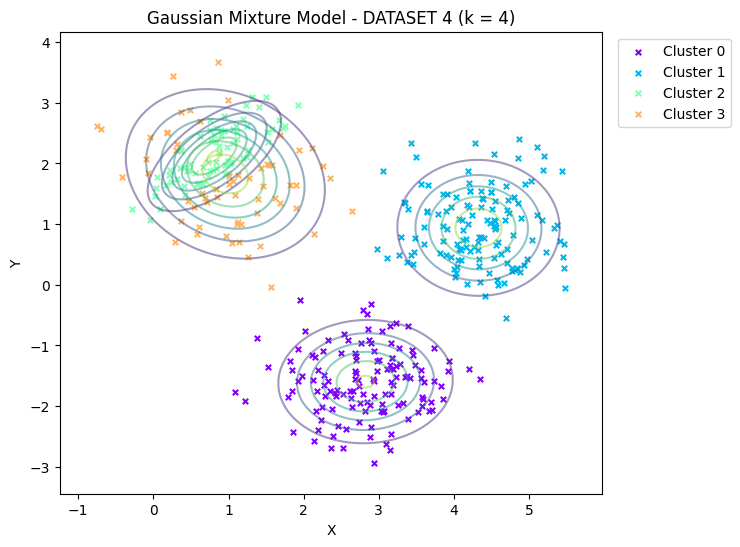

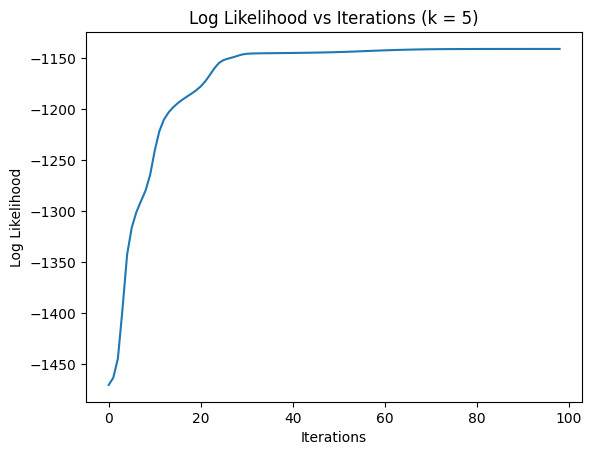

Score :  0.36204766229663704


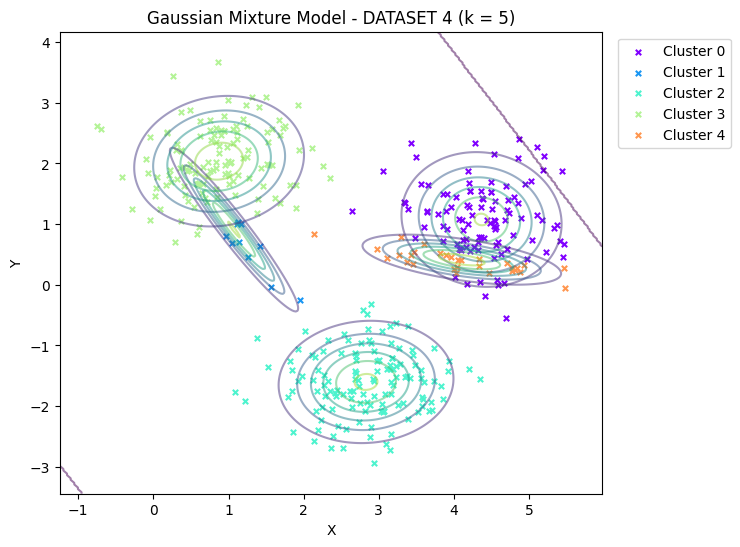

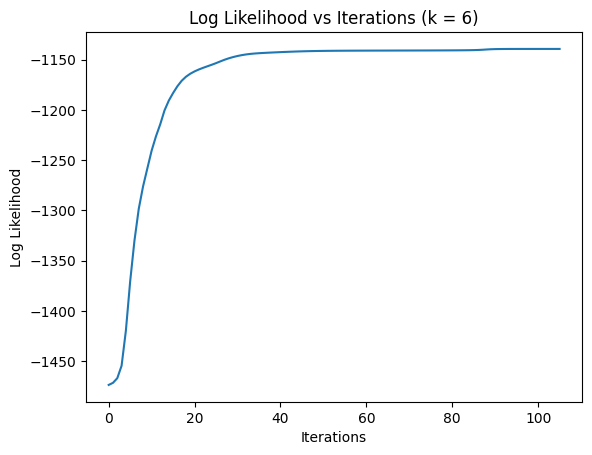

Score :  0.34672361283143416


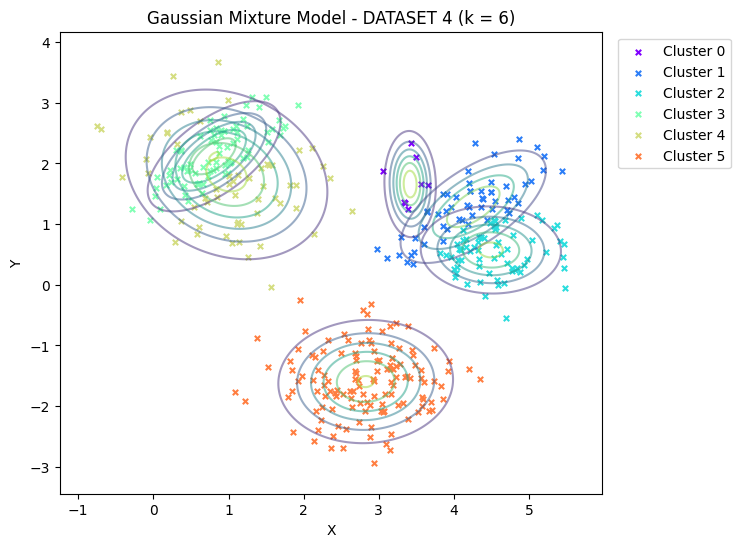

In [ ]:
dataset = pd.read_csv('dataset.csv', header = None)
from matplotlib import cm

for k in range(2,7):
  cluster, means, covar, log_likelihood, score = GMM(dataset.values, k)
  plot_log_likelihood(log_likelihood, k)
  plt.figure(figsize=(7, 6))
  plot_Gaussian(dataset.values, means, covar)
  print("Score : ", score)

  # plot the clusters
  for i in np.unique(cluster):
    plt.scatter(dataset[0][cluster == i], dataset[1][cluster == i], c = np.array([cm.rainbow(i/len(np.unique(cluster)))]) ,s=15,  marker = 'x')
    plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)][0:], loc = 'upper right', bbox_to_anchor=(1.25, 1))

  plt.title('Gaussian Mixture Model - DATASET 4' + ' (k = ' + str(k) + ')')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

## **Finding the Optimal 'K'**


---

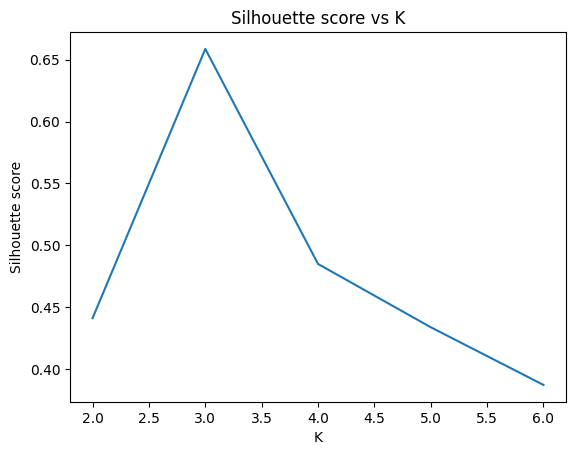

In [ ]:
scorelist=[]
xlabel=[]
for k in range(2,7):
  cluster, means, covar, log_likelihood, score = GMM(dataset.values, k)
  scorelist.append(score)
  xlabel.append(k)
plt.title("Silhouette score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette score")
plt.plot(xlabel,scorelist)